# Understanding Experimental Data

In [3]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import math
#set line width
plt.rcParams['lines.linewidth'] = 4
#set font size for titles 
plt.rcParams['axes.titlesize'] = 18
#set font size for labels on axes
plt.rcParams['axes.labelsize'] = 16
#set size of num_bers on x-axis
plt.rcParams['xtick.labelsize'] = 16
#set size of num_bers on y-axis
plt.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
plt.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
plt.rcParams['ytick.major.size'] = 7
#set size of markers, e.g., circles representing points
plt.rcParams['lines.markersize'] = 10
#set num_ber of times marker is shown when displaying legend
plt.rcParams['legend.numpoints'] = 1
#Set size of type in legend
plt.rcParams['legend.fontsize'] = 14

In [4]:
# # Figure 20-2 from page 434
def get_data(input_file):
    with open(input_file, 'r') as data_file:
        distances = []
        masses = []
        data_file.readline() #ignore header
        for line in data_file:
            d, m = line.split(',')
            distances.append(float(d))
            masses.append(float(m))
    return (masses, distances)

In [5]:
# # Figure 20-3 from page 434
def plot_data(input_file):
    masses, distances = get_data(input_file)
    distances = np.array(distances) 
    masses = np.array(masses)
    forces = masses*9.81
    plt.plot(forces, distances, 'bo',
               label = 'Measured displacements')
    plt.title('Measured Displacement of Spring')
    plt.xlabel('|Force| (Newtons)')
    plt.ylabel('Distance (meters)')

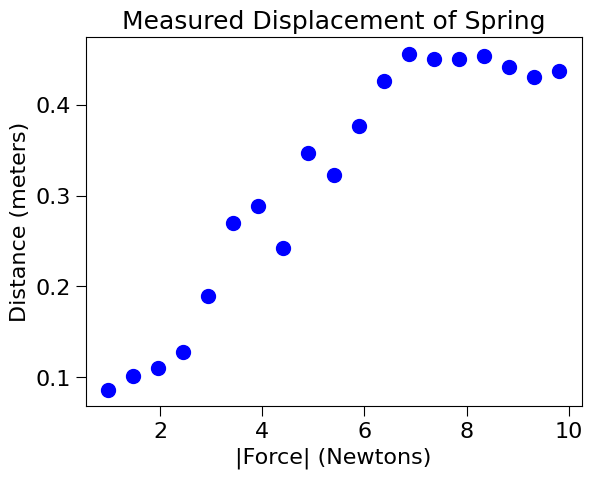

In [6]:
plot_data('springData.csv')

In [7]:
# # Figure 20-5 from page 438    
def fit_data(input_file):
    masses, distances = get_data(input_file)
    distances = np.array(distances)
    forces = np.array(masses)*9.81
    plt.plot(forces, distances, 'ko',
               label = 'Measured displacements')
    plt.title('Measured Displacement of Spring')
    plt.xlabel('|Force| (Newtons)')
    plt.ylabel('Distance (meters)')
    #find linear fit
    a,b = np.polyfit(forces, distances, 1)
    predicted_distances = a*np.array(forces) + b
    k = 1.0/a #see explanation in text
    plt.plot(forces, predicted_distances,
             label = f'Linear fit, k = {k:.4f}')
    plt.legend(loc = 'best')

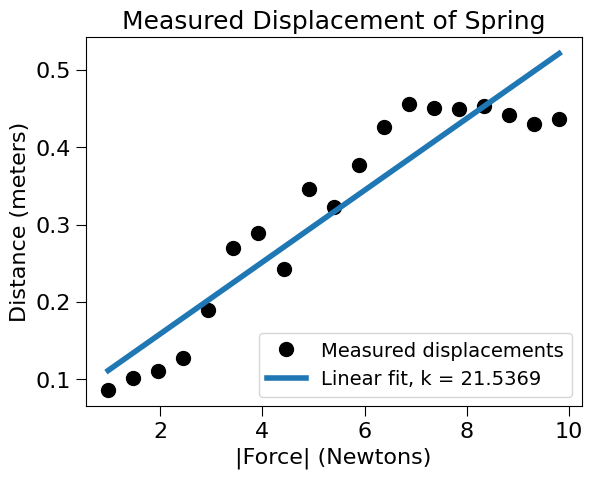

In [8]:
fit_data('springData.csv')

In [9]:
# # fit_data with code from page 439
def fit_data(input_file):
    masses, distances = get_data(input_file)
    distances = np.array(distances)
    forces = np.array(masses)*9.81
    plt.plot(forces, distances, 'ko',
               label = 'Measured displacements')
    plt.title('Measured Displacement of Spring')
    plt.xlabel('|Force| (Newtons)')
    plt.ylabel('Distance (meters)')
    #find linear fit
    a,b = np.polyfit(forces, distances, 1)
    predicted_distances = a*np.array(forces) + b
    k = 1.0/a #see explanation in text
    plt.plot(forces, predicted_distances,
             label = 'Linear fit, k = ' + str(round(k, 5)))
    #find cubic fit
    fit = np.polyfit(forces, distances, 3)
    predicted_distances = np.polyval(fit, forces)
    plt.plot(forces, predicted_distances, 'k:', label = 'cubic fit')
    plt.legend(loc = 'best')

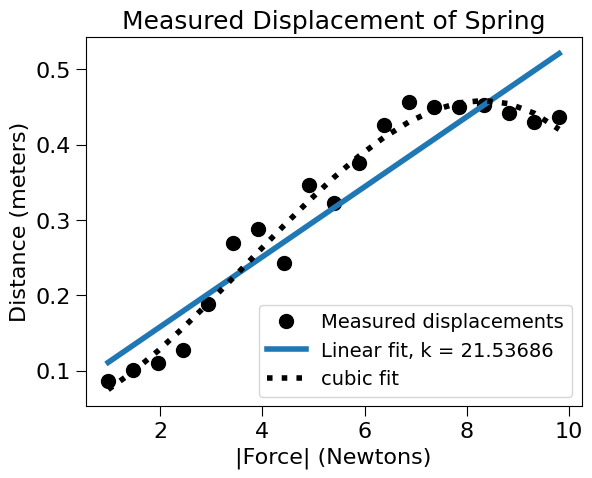

In [10]:
fit_data('springData.csv')

In [11]:
# Code used to prodcue plot on page 441
def fit_data(input_file):
    masses, distances = get_data(input_file)
    distances = np.array(distances)
    forces = np.array(masses)*9.81
    new_forces = np.append(forces, np.array([1.5*9.81]))
    plt.plot(forces, distances, 'ko',
                label = 'Measured displacements')
    plt.title('Measured Displacement of Spring')
    plt.xlabel('|Force| (Newtons)')
    plt.ylabel('Distance (meters)')
    #find linear fit
    a,b = np.polyfit(forces, distances, 1)
    predicted_distances = a*np.array(new_forces) + b
    k = 1.0/a #see explanation in text
    plt.plot(new_forces, predicted_distances,
              label = 'Linear fit, k = ' + str(round(k, 5)))
    # find cubic fit
    fit = np.polyfit(forces, distances, 3)
    predicted_distances = np.polyval(fit, new_forces)
    plt.plot(new_forces, predicted_distances, 'k:', label = 'cubic fit')
    plt.legend(loc = 'best')

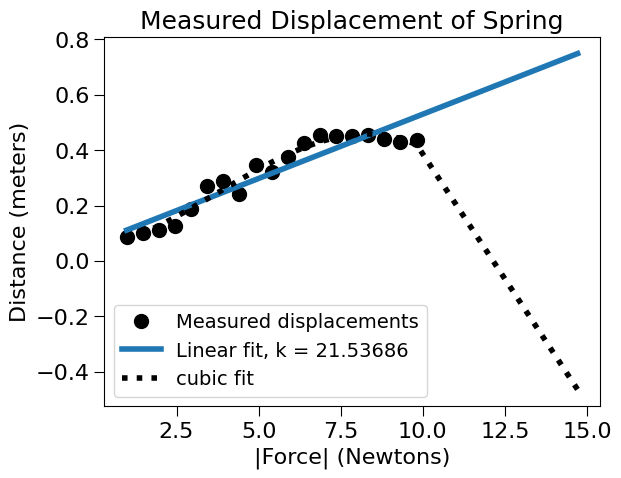

In [12]:
fit_data('springData.csv')

In [13]:
# # Figure 20-11 from page 444
def get_trajectory_data(file_name):
    distances = []
    heights1, heights2, heights3, heights4 = [],[],[],[]
    with open(file_name, 'r') as data_file:
        data_file.readline()
        for line in data_file:
            d, h1, h2, h3, h4 = line.split(',')
            distances.append(float(d))
            heights1.append(float(h1))
            heights2.append(float(h2))
            heights3.append(float(h3))
            heights4.append(float(h4))
    return (distances, [heights1, heights2, heights3, heights4])

def process_trajectories(file_name):
    distances, heights = get_trajectory_data(file_name)
    num_trials = len(heights)
    distances = np.array(distances)
    #Get array containing mean height at each distance
    tot_heights = np.array([0]*len(distances))
    for h in heights:
        tot_heights = tot_heights + np.array(h)
    mean_heights = tot_heights/len(heights)
    plt.title('Trajectory of Projectile (Mean of '\
                + str(num_trials) + ' Trials)')
    plt.xlabel('Inches from Launch Point')
    plt.ylabel('Inches Above Launch Point')
    plt.plot(distances, mean_heights, 'ko')
    fit = np.polyfit(distances, mean_heights, 1)
    altitudes = np.polyval(fit, distances)
    plt.plot(distances, altitudes, 'b', label = 'Linear Fit')
    fit = np.polyfit(distances, mean_heights, 2)
    altitudes = np.polyval(fit, distances)
    plt.plot(distances, altitudes, 'k:', label = 'Quadratic Fit')
    plt.legend()

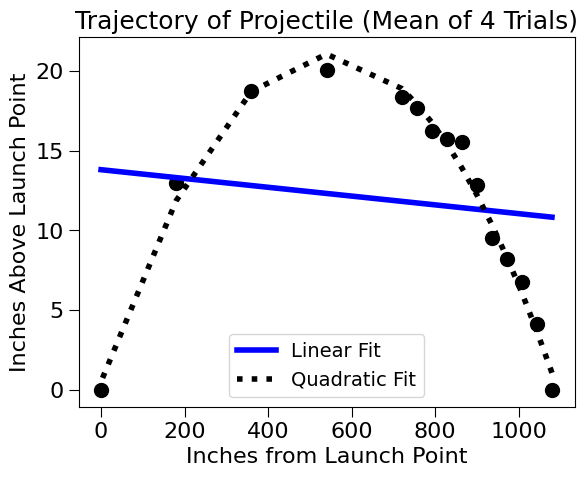

In [14]:
process_trajectories('launcherData.csv')

In [15]:
# # Figure 20-13 on page 447
def r_squared(measured, predicted):
    """Assumes measured a one-dimensional array of measured values
               predicted a one-dimensional array of predicted values
       Returns coefficient of determination"""
    estimated_error = ((predicted - measured)**2).sum()
    mean_of_measured = measured.sum()/len(measured)
    variability = ((measured - mean_of_measured)**2).sum()
    return 1 - estimated_error/variability

In [16]:
# # process_trajectories with changes suggested on page 447
def process_trajectories(file_name):
    distances, heights = get_trajectory_data(file_name)
    num_trials = len(heights)
    distances = np.array(distances)
    #Get array containing mean height at each distance
    tot_heights = np.array([0]*len(distances))
    for h in heights:
        tot_heights = tot_heights + np.array(h)
    mean_heights = tot_heights/len(heights)
    plt.title('Trajectory of Projectile (Mean of '\
                + str(num_trials) + ' Trials)')
    plt.xlabel('Inches from Launch Point')
    plt.ylabel('Inches Above Launch Point')
    plt.plot(distances, mean_heights, 'ko')
    fit = np.polyfit(distances, mean_heights, 1)
    altitudes = np.polyval(fit, distances)
    plt.plot(distances, altitudes, 'b', label = 'Linear Fit')
    print('r**2 of linear fit =', r_squared(mean_heights, altitudes))
    fit = np.polyfit(distances, mean_heights, 2)
    altitudes = np.polyval(fit, distances)
    plt.plot(distances, altitudes, 'k:', label = 'Quadratic Fit')
    print('r**2 of quadratic fit =', r_squared(mean_heights, altitudes))
    plt.legend()

r**2 of linear fit = 0.0177433205440769
r**2 of quadratic fit = 0.9857653692869693


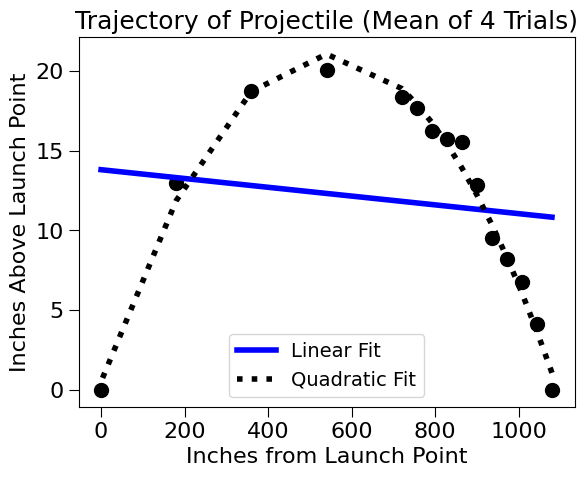

In [17]:
process_trajectories('launcherData.csv')

In [18]:
# # Figure 20-14 on page 448
def get_horizontal_speed(quad_fit, min_x, max_x):
    """Assumes quad_fit has coefficients of a quadratic polynomial
               min_x and max_x are distances in inches
       Returns horizontal speed in feet per second"""
    inches_per_foot = 12
    x_mid = (max_x - min_x)/2
    a,b,c = quad_fit[0], quad_fit[1], quad_fit[2]
    y_peak = a*x_mid**2 + b*x_mid + c
    g = 32.16*inches_per_foot #accel. of gravity in inches/sec/sec
    t = (2*y_peak/g)**0.5 #time in seconds from peak to target
    print('Horizontal speed =',
          int(x_mid/(t*inches_per_foot)), 'feet/sec')

In [19]:
# # process_trajectories with change suggested on page 449
def process_trajectories(file_name):
    distances, heights = get_trajectory_data(file_name)
    num_trials = len(heights)
    distances = np.array(distances)
    #Get array containing mean height at each distance
    tot_heights = np.array([0]*len(distances))
    for h in heights:
        tot_heights = tot_heights + np.array(h)
    mean_heights = tot_heights/len(heights)
    plt.title('Trajectory of Projectile (Mean of '\
                + str(num_trials) + ' Trials)')
    plt.xlabel('Inches from Launch Point')
    plt.ylabel('Inches Above Launch Point')
    plt.plot(distances, mean_heights, 'ko')
    fit = np.polyfit(distances, mean_heights, 1)
    altitudes = np.polyval(fit, distances)
    plt.plot(distances, altitudes, 'b', label = 'Linear Fit')
    print('r_squared of linear fit =', r_squared(mean_heights, altitudes))
    fit = np.polyfit(distances, mean_heights, 2)
    altitudes = np.polyval(fit, distances)
    plt.plot(distances, altitudes, 'k:', label = 'Quadratic Fit')
    print('r_squared of quadratic fit =', r_squared(mean_heights, altitudes))
    plt.legend()
    get_horizontal_speed(fit, distances[-1], distances[0])

r_squared of linear fit = 0.0177433205440769
r_squared of quadratic fit = 0.9857653692869693
Horizontal speed = 136 feet/sec


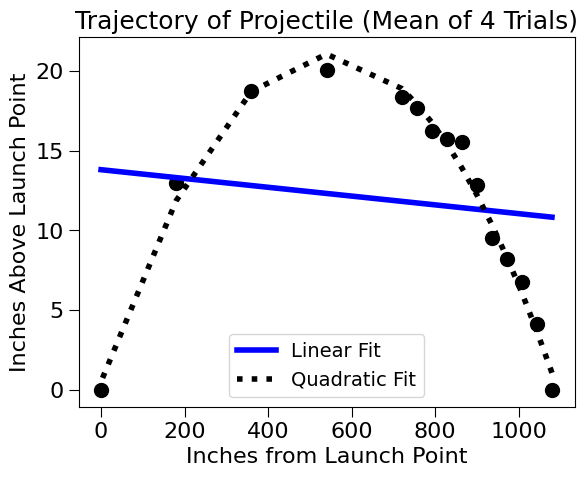

In [20]:
process_trajectories('launcherData.csv')

Model predicts that 3**20 is roughly 2.4547827637212674e+48
Actual value of 3**20 is 3486784401


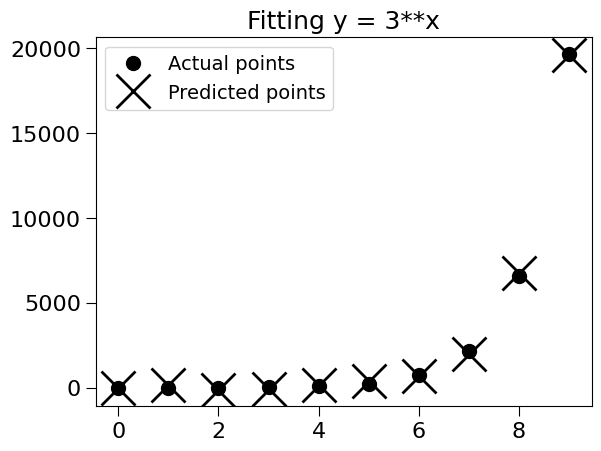

In [21]:
# Figure 20-15 on page 450
vals = []
for i in range(10):
    vals.append(3**i)
plt.plot(vals,'ko', label = 'Actual points')
x_vals = np.arange(10)
fit = np.polyfit(x_vals, vals, 5)
y_vals = np.polyval(fit, x_vals)
plt.plot(y_vals, 'kx', label = 'Predicted points',
            markeredgewidth = 2, markersize = 25)
plt.title('Fitting y = 3**x')
plt.legend(loc = 'upper left')

# Code at bottom of page 450
print('Model predicts that 3**20 is roughly',
      np.polyval(fit, [3**20])[0])
print('Actual value of 3**20 is', 3**20)

[]

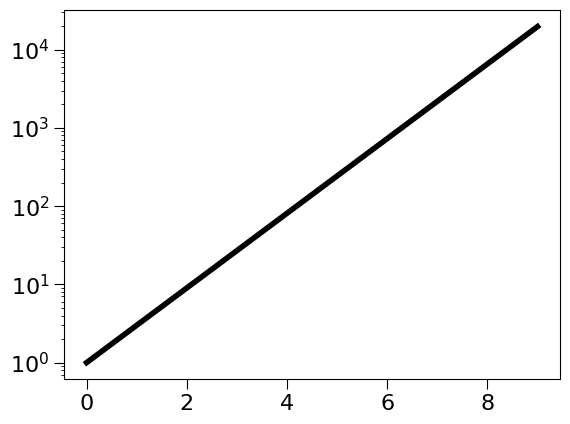

In [22]:
# Code from page 451
x_vals, y_vals = [], []
for i in range(10):
    x_vals.append(i)
    y_vals.append(3**i)
plt.plot(x_vals, y_vals, 'k')
plt.semilogy()

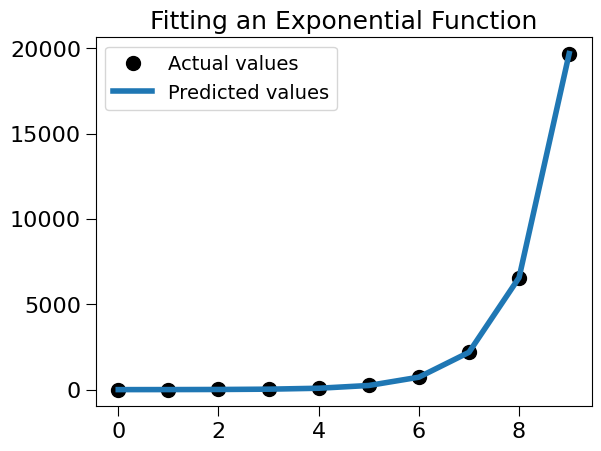

In [23]:
# # Figure 20-18 on page 452
def create_data(f, x_vals):
    """Assumes f is a function of one argument
                x_vals is an array of suitable arguments for f
       Returns array containing results of applying f to the
               elements of x_vals"""
    y_vals = []
    for i in x_vals:
        y_vals.append(f(x_vals[i]))
    return np.array(y_vals)

def fit_exp_data(x_vals, y_vals):
    """Assumes x_vals and y_vals arrays of numbers such that
         y_vals[i] == f(x_vals[i]), where f is an exponential function
       Returns a, b, base such that log(f(x), base) == ax + b"""
    log_vals = []
    for y in y_vals:
        log_vals.append(math.log(y, 2)) #get log base 2
    fit = np.polyfit(x_vals, log_vals, 1)
    return fit, 2

# Code from page 453
x_vals = range(10)
f = lambda x: 3**x
y_vals = create_data(f, x_vals)
plt.plot(x_vals, y_vals, 'ko', label = 'Actual values')
fit, base = fit_exp_data(x_vals, y_vals)
predictedy_vals = []
for x in x_vals:
    predictedy_vals.append(base**np.polyval(fit, x))
plt.plot(x_vals, predictedy_vals, label = 'Predicted values')
plt.title('Fitting an Exponential Function')
plt.legend(loc = 'upper left')

In [24]:
#Look at a value for x not in original data
print('f(20) =', f(20))
print('Predicted value =', int(base**(np.polyval(fit, [20]))))

f(20) = 3486784401
Predicted value = 3486784401


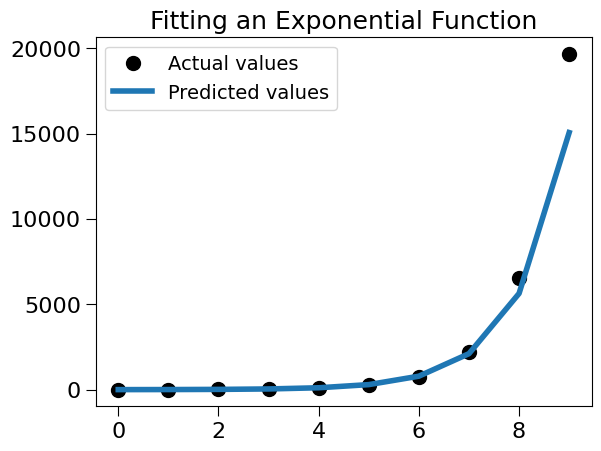

In [25]:
# # Code from page 453 modified as described on page 454
x_vals = range(10)
f = lambda x: 3**x + 3
y_vals = create_data(f, x_vals)
plt.plot(x_vals, y_vals, 'ko', label = 'Actual values')
fit, base = fit_exp_data(x_vals, y_vals)
predictedy_vals = []
for x in x_vals:
    predictedy_vals.append(base**np.polyval(fit, x))
plt.plot(x_vals, predictedy_vals, label = 'Predicted values')
plt.title('Fitting an Exponential Function')
plt.legend(loc = 'upper left')

In [26]:
#Look at a value for x not in original data
print('f(20) =', f(20))
print('Predicted value =', int(base**(np.polyval(fit, [20]))))

f(20) = 3486784404
Predicted value = 747520352
